In [20]:
import itertools
import pandas as pd
import numpy as np
import re
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
###################
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
# Deep learning:
# from tensorflow.python.keras.models import Input

from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D

from keras.models import Model

# from keras.models import Input, Model

from scipy import sparse

In [22]:
texts = pd.read_csv('2.csv')

texts = [x for x in texts[:]['text']]
print(len(texts))
print(texts)

19
['You is kind. You is smart. You is important', 'Call me Ishmael.', 'It was a pleasure to burn.', ' I am an invisible man.', 'It was a bright, cold day in April, and the clocks were striking thirteen.', 'Nobody puts Baby in a corner', 'All happy families are alike; each unhappy family is unhappy in its own way.', 'This is Sparta ', "Ships at a distance have every man's wish on board.", "You better not never tell nobody but God. It'd kill your mammy.", "124 was spiteful. Full of Baby's venom.", 'This is my favorite book in all the world, though I never read it.', ' It was the day my Grandmother exploded.', ' The sweat wis lashing oafay Sick Boy; he wis trembling.', 'One cannot step twice in the same river', 'The unexamined life is not worth living', 'The price of greatness is responsibility', 'The only thing we have to fear is fear itself', 'Where there is love there is life']


In [23]:
def text_preprocessing(
        text: list,
        punctuations=r'''+-’”!()-[]{};:'"\,<''>./?@#$%^&*.._“~``...--''',
        stop_words= set(stopwords.words('english'))
) -> list:
    """
    A method to preproces text
    """

    # for x in text.lower():
    #     if x in punctuations:
    #         text = text.replace(x, "")

    stop_words.update({"'ll", "'m", "'re", "'s", "'ve"})

    # Removing words that have numbers in them
    text = re.sub(r'\w*\d\w*', '', text)

    # Removing digits
    text = re.sub(r'[0-9]+', '', text)

    # Cleaning the whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Setting every word to lower
    text = text.lower()

    text = word_tokenize(text)

    # # Converting all our text to a list 
    # text = text.split(' ')

    # Droping empty strings
    text = [x for x in text if x != '']

    # Droping stop words
    text = [x for x in text if x not in stop_words]

    text = [x for x in text if x not in punctuations]

    return text

In [24]:
def create_unique_word_dict(text: list) -> dict:
    """
    A method that creates a dictionary where the keys are unique words
    and key values are indices
    """
    # Getting all the unique words from our text and sorting them alphabetically
    words = list(set(text))
    words.sort()

    # Creating the dictionary for the unique words
    unique_word_dict = {}
    for i, word in enumerate(words):
        unique_word_dict.update({
            word: i
        })

    return unique_word_dict

# First Text

In [25]:
# Defining the window for context
window = 2

# Creating a placeholder for the scanning of the word list
word_lists = []
all_text = []
for text in texts:

    # Cleaning the text
    text = text_preprocessing(text)
    # print (text)

    # Appending to the all text list
    all_text += text

    # Creating a context dictionary
    for i, word in enumerate(text):
        for w in range(window):
            # Getting the context that is ahead by *window* words
            if i + 1 + w < len(text):
                word_lists.append([word] + [text[(i + 1 + w)]])
            # Getting the context that is behind by *window* words
            if i - w - 1 >= 0:
                word_lists.append([word] + [text[(i - w - 1)]])

word_lists

[['kind', 'smart'],
 ['kind', 'important'],
 ['smart', 'important'],
 ['smart', 'kind'],
 ['important', 'smart'],
 ['important', 'kind'],
 ['call', 'ishmael'],
 ['ishmael', 'call'],
 ['pleasure', 'burn'],
 ['burn', 'pleasure'],
 ['invisible', 'man'],
 ['man', 'invisible'],
 ['bright', 'cold'],
 ['bright', 'day'],
 ['cold', 'day'],
 ['cold', 'bright'],
 ['cold', 'april'],
 ['day', 'april'],
 ['day', 'cold'],
 ['day', 'clocks'],
 ['day', 'bright'],
 ['april', 'clocks'],
 ['april', 'day'],
 ['april', 'striking'],
 ['april', 'cold'],
 ['clocks', 'striking'],
 ['clocks', 'april'],
 ['clocks', 'thirteen'],
 ['clocks', 'day'],
 ['striking', 'thirteen'],
 ['striking', 'clocks'],
 ['striking', 'april'],
 ['thirteen', 'striking'],
 ['thirteen', 'clocks'],
 ['nobody', 'puts'],
 ['nobody', 'baby'],
 ['puts', 'baby'],
 ['puts', 'nobody'],
 ['puts', 'corner'],
 ['baby', 'corner'],
 ['baby', 'puts'],
 ['baby', 'nobody'],
 ['corner', 'baby'],
 ['corner', 'puts'],
 ['happy', 'families'],
 ['happy', 'al

In [26]:
unique_word_dict = create_unique_word_dict(all_text)
# Defining the number of features (unique words)
n_words = len(unique_word_dict)
print(unique_word_dict)

# Getting all the unique words
words_1 = list(unique_word_dict.keys())
print(words_1)

# Creating the X and Y matrices using one hot encoding
print(n_words)

{"'d": 0, 'alike': 1, 'april': 2, 'baby': 3, 'better': 4, 'board': 5, 'book': 6, 'boy': 7, 'bright': 8, 'burn': 9, 'call': 10, 'clocks': 11, 'cold': 12, 'corner': 13, 'day': 14, 'distance': 15, 'every': 16, 'exploded': 17, 'families': 18, 'family': 19, 'favorite': 20, 'fear': 21, 'full': 22, 'god': 23, 'grandmother': 24, 'greatness': 25, 'happy': 26, 'important': 27, 'invisible': 28, 'ishmael': 29, 'kill': 30, 'kind': 31, 'lashing': 32, 'life': 33, 'living': 34, 'love': 35, 'mammy': 36, 'man': 37, 'never': 38, 'nobody': 39, 'oafay': 40, 'one': 41, 'pleasure': 42, 'price': 43, 'puts': 44, 'read': 45, 'responsibility': 46, 'river': 47, 'ships': 48, 'sick': 49, 'smart': 50, 'sparta': 51, 'spiteful': 52, 'step': 53, 'striking': 54, 'sweat': 55, 'tell': 56, 'thing': 57, 'thirteen': 58, 'though': 59, 'trembling': 60, 'twice': 61, 'unexamined': 62, 'unhappy': 63, 'venom': 64, 'way': 65, 'wis': 66, 'wish': 67, 'world': 68, 'worth': 69}
["'d", 'alike', 'april', 'baby', 'better', 'board', 'book'

In [27]:
X = []
Y = []
for i, word_list in tqdm(enumerate(word_lists)):
    # Getting the indices
    print(word_list)
    main_word_index = unique_word_dict.get(word_list[0])
    context_word_index = unique_word_dict.get(word_list[1])
    # print (word_list)
    print(word_list[0], main_word_index)
    print(word_list[1], context_word_index)

    # Creating the placeholders
    X_row = np.zeros(n_words)
    Y_row = np.zeros(n_words)

    # One hot encoding the main word
    X_row[main_word_index] = 1

    # One hot encoding the Y matrix words
    Y_row[context_word_index] = 1

    # Appending to the main matrices
    X.append(X_row)
    Y.append(Y_row)

# Converting the matrices into a sparse format because the vast majority of the data are 0s
print(X)
print(Y)

59it [00:00, 540.06it/s]

['kind', 'smart']
kind 31
smart 50
['kind', 'important']
kind 31
important 27
['smart', 'important']
smart 50
important 27
['smart', 'kind']
smart 50
kind 31
['important', 'smart']
important 27
smart 50
['important', 'kind']
important 27
kind 31
['call', 'ishmael']
call 10
ishmael 29
['ishmael', 'call']
ishmael 29
call 10
['pleasure', 'burn']
pleasure 42
burn 9
['burn', 'pleasure']
burn 9
pleasure 42
['invisible', 'man']
invisible 28
man 37
['man', 'invisible']
man 37
invisible 28
['bright', 'cold']
bright 8
cold 12
['bright', 'day']
bright 8
day 14
['cold', 'day']
cold 12
day 14
['cold', 'bright']
cold 12
bright 8
['cold', 'april']
cold 12
april 2
['day', 'april']
day 14
april 2
['day', 'cold']
day 14
cold 12
['day', 'clocks']
day 14
clocks 11
['day', 'bright']
day 14
bright 8
['april', 'clocks']
april 2
clocks 11
['april', 'day']
april 2
day 14
['april', 'striking']
april 2
striking 54
['april', 'cold']
april 2
cold 12
['clocks', 'striking']
clocks 11
striking 54
['clocks', 'april']


204it [00:00, 500.53it/s]

 20
book 6
['favorite', 'world']
favorite 20
world 68
['book', 'world']
book 6
world 68
['book', 'favorite']
book 6
favorite 20
['book', 'though']
book 6
though 59
['world', 'though']
world 68
though 59
['world', 'book']
world 68
book 6
['world', 'never']
world 68
never 38
['world', 'favorite']
world 68
favorite 20
['though', 'never']
though 59
never 38
['though', 'world']
though 59
world 68
['though', 'read']
though 59
read 45
['though', 'book']
though 59
book 6
['never', 'read']
never 38
read 45
['never', 'though']
never 38
though 59
['never', 'world']
never 38
world 68
['read', 'never']
read 45
never 38
['read', 'though']
read 45
though 59
['day', 'grandmother']
day 14
grandmother 24
['day', 'exploded']
day 14
exploded 17
['grandmother', 'exploded']
grandmother 24
exploded 17
['grandmother', 'day']
grandmother 24
day 14
['exploded', 'grandmother']
exploded 17
grandmother 24
['exploded', 'day']
exploded 17
day 14
['sweat', 'wis']
sweat 55
wis 66
['sweat', 'lashing']
sweat 55
lashing 

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [28]:
import tensorflow as tf

# X= sparse.csr_matrix(X)
# Y = sparse.csr_matrix(Y)
# print (X)
# print(X[0, :].toarray())
# print (X.todense())
# a = X.todense()
# print (a[0])
XX = tf.convert_to_tensor(X, dtype=tf.float32)
YY = tf.convert_to_tensor(Y, dtype=tf.float32)
print(XX.shape)
print(YY.shape)

(204, 70)
(204, 70)


In [29]:
def CreateModel():
    # Defining the size of the embedding
    embed_size = 2
    # Defining the neural network

    # inp = Input(shape=(X.shape[1],))
    inp = Input(shape=XX.shape[1])  # 21
    x = Dense(units=embed_size, activation='linear')(inp)
    # x = Dense(units=21, activation='softmax')(x)
    x = Dense(units=YY.shape[1], activation='softmax')(x)

    model = Model(inputs=inp, outputs=x)
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    model.summary()
    return model

In [30]:
model_1 = CreateModel()
# Optimizing the network weights
model_1.fit(
    x=XX,
    y=YY,
    batch_size=10,
    epochs=2000
)


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 70)]              0         
                                                                 
 dense_2 (Dense)             (None, 2)                 142       
                                                                 
 dense_3 (Dense)             (None, 70)                210       
                                                                 
Total params: 352
Trainable params: 352
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
21/21 [==============================] - 1s 6ms/step - loss: 4.2487
Epoch 2/2000
21/21 [==============================] - 0s 3ms/step - loss: 4.2440
Epoch 3/2000
21/21 [==============================] - 0s 4ms/step - loss: 4.2401
Epoch 4/2000
21/21 [==============================] - 0s 4ms/step - loss: 4.2365
E

In [31]:

# The input layer

weights_1 = model_1.get_weights()[0] #21*2
print(weights_1.shape)
print(weights_1[1][1])
print(weights_1)

# weights = model.get_weights()[2]
# print (weights)

(70, 2)
8.250128
[[ -0.44931883  -5.252234  ]
 [  1.6258143    8.250128  ]
 [ -7.677414     4.0502024 ]
 [  0.72281355  -0.4552658 ]
 [ -2.915984    -2.1239364 ]
 [  5.231769     1.9738644 ]
 [-10.827032    -0.9692582 ]
 [ 10.778151    -3.1360185 ]
 [-10.690517     9.639515  ]
 [  3.1034296   -8.807578  ]
 [  3.2491314   -7.781356  ]
 [ -8.243847     3.092683  ]
 [ -6.9785223    5.2145314 ]
 [ -0.28067884  -0.09260312]
 [ -5.680381     4.8056803 ]
 [  6.038941     2.944225  ]
 [  5.138461     2.4501386 ]
 [ -5.90838      7.0493593 ]
 [  2.7739341    7.2051997 ]
 [  5.501541    10.640027  ]
 [-11.085392    -2.2904308 ]
 [ 12.532721     8.014945  ]
 [  1.1497883    0.1259469 ]
 [ -0.89026237  -3.8475547 ]
 [ -5.0682344    5.849629  ]
 [  8.298061   -10.912665  ]
 [  2.207252     6.6853395 ]
 [  3.8243997   -3.0174935 ]
 [  8.491192     2.9326046 ]
 [ -2.9092312    1.3000729 ]
 [ -0.56501126  -7.3159533 ]
 [  3.814134    -3.0039356 ]
 [ 10.265166    -2.9571083 ]
 [ -6.0371146  -11.083472 

In [33]:
#get the weight for each unique word
embedding_dict_1 = {}
for word in words_1: #to pick the a row of weight of two values for each unique word since weights = 21*2
    embedding_dict_1.update({
        word: weights_1[unique_word_dict.get(word)]
    })

print(embedding_dict_1)

{"'d": array([-0.44931883, -5.252234  ], dtype=float32), 'alike': array([1.6258143, 8.250128 ], dtype=float32), 'april': array([-7.677414 ,  4.0502024], dtype=float32), 'baby': array([ 0.72281355, -0.4552658 ], dtype=float32), 'better': array([-2.915984 , -2.1239364], dtype=float32), 'board': array([5.231769 , 1.9738644], dtype=float32), 'book': array([-10.827032 ,  -0.9692582], dtype=float32), 'boy': array([10.778151 , -3.1360185], dtype=float32), 'bright': array([-10.690517,   9.639515], dtype=float32), 'burn': array([ 3.1034296, -8.807578 ], dtype=float32), 'call': array([ 3.2491314, -7.781356 ], dtype=float32), 'clocks': array([-8.243847,  3.092683], dtype=float32), 'cold': array([-6.9785223,  5.2145314], dtype=float32), 'corner': array([-0.28067884, -0.09260312], dtype=float32), 'day': array([-5.680381 ,  4.8056803], dtype=float32), 'distance': array([6.038941, 2.944225], dtype=float32), 'every': array([5.138461 , 2.4501386], dtype=float32), 'exploded': array([-5.90838  ,  7.04935

0  >>  'd
1  >>  alike
2  >>  april
3  >>  baby
4  >>  better
5  >>  board
6  >>  book
7  >>  boy
8  >>  bright
9  >>  burn
10  >>  call
11  >>  clocks
12  >>  cold
13  >>  corner
14  >>  day
15  >>  distance
16  >>  every
17  >>  exploded
18  >>  families
19  >>  family
20  >>  favorite
21  >>  fear
22  >>  full
23  >>  god
24  >>  grandmother
25  >>  greatness
26  >>  happy
27  >>  important
28  >>  invisible
29  >>  ishmael
30  >>  kill
31  >>  kind
32  >>  lashing
33  >>  life
34  >>  living
35  >>  love
36  >>  mammy
37  >>  man
38  >>  never
39  >>  nobody
40  >>  oafay
41  >>  one
42  >>  pleasure
43  >>  price
44  >>  puts
45  >>  read
46  >>  responsibility
47  >>  river
48  >>  ships
49  >>  sick
50  >>  smart
51  >>  sparta
52  >>  spiteful
53  >>  step
54  >>  striking
55  >>  sweat
56  >>  tell
57  >>  thing
58  >>  thirteen
59  >>  though
60  >>  trembling
61  >>  twice
62  >>  unexamined
63  >>  unhappy
64  >>  venom
65  >>  way
66  >>  wis
67  >>  wish
68  >>  world
69 

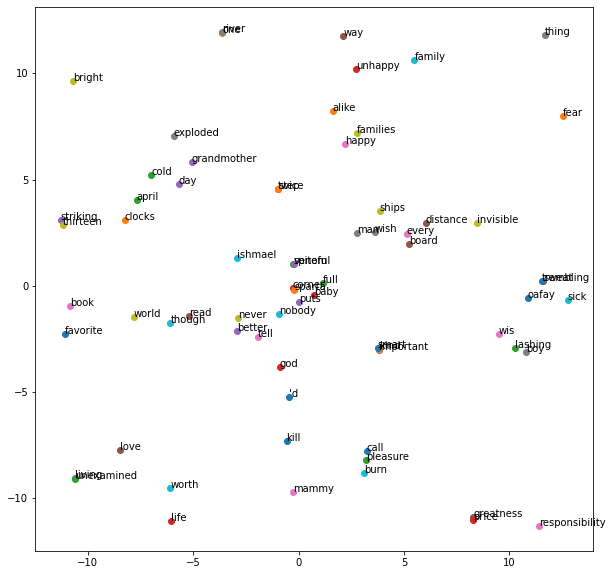

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
i = 0
for word in list(unique_word_dict.keys()):
    print(i, ' >> ', word)
    coord = embedding_dict_1.get(word)
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))
    i = i + 1


In [35]:
# The input layer
weights_1 = model_1.get_weights()[0]
# weights[: , 0] = 0

0  >>  'd
1  >>  alike
2  >>  april
3  >>  baby
4  >>  better
5  >>  board
6  >>  book
7  >>  boy
8  >>  bright
9  >>  burn
10  >>  call
11  >>  clocks
12  >>  cold
13  >>  corner
14  >>  day
15  >>  distance
16  >>  every
17  >>  exploded
18  >>  families
19  >>  family
20  >>  favorite
21  >>  fear
22  >>  full
23  >>  god
24  >>  grandmother
25  >>  greatness
26  >>  happy
27  >>  important
28  >>  invisible
29  >>  ishmael
30  >>  kill
31  >>  kind
32  >>  lashing
33  >>  life
34  >>  living
35  >>  love
36  >>  mammy
37  >>  man
38  >>  never
39  >>  nobody
40  >>  oafay
41  >>  one
42  >>  pleasure
43  >>  price
44  >>  puts
45  >>  read
46  >>  responsibility
47  >>  river
48  >>  ships
49  >>  sick
50  >>  smart
51  >>  sparta
52  >>  spiteful
53  >>  step
54  >>  striking
55  >>  sweat
56  >>  tell
57  >>  thing
58  >>  thirteen
59  >>  though
60  >>  trembling
61  >>  twice
62  >>  unexamined
63  >>  unhappy
64  >>  venom
65  >>  way
66  >>  wis
67  >>  wish
68  >>  world
69 

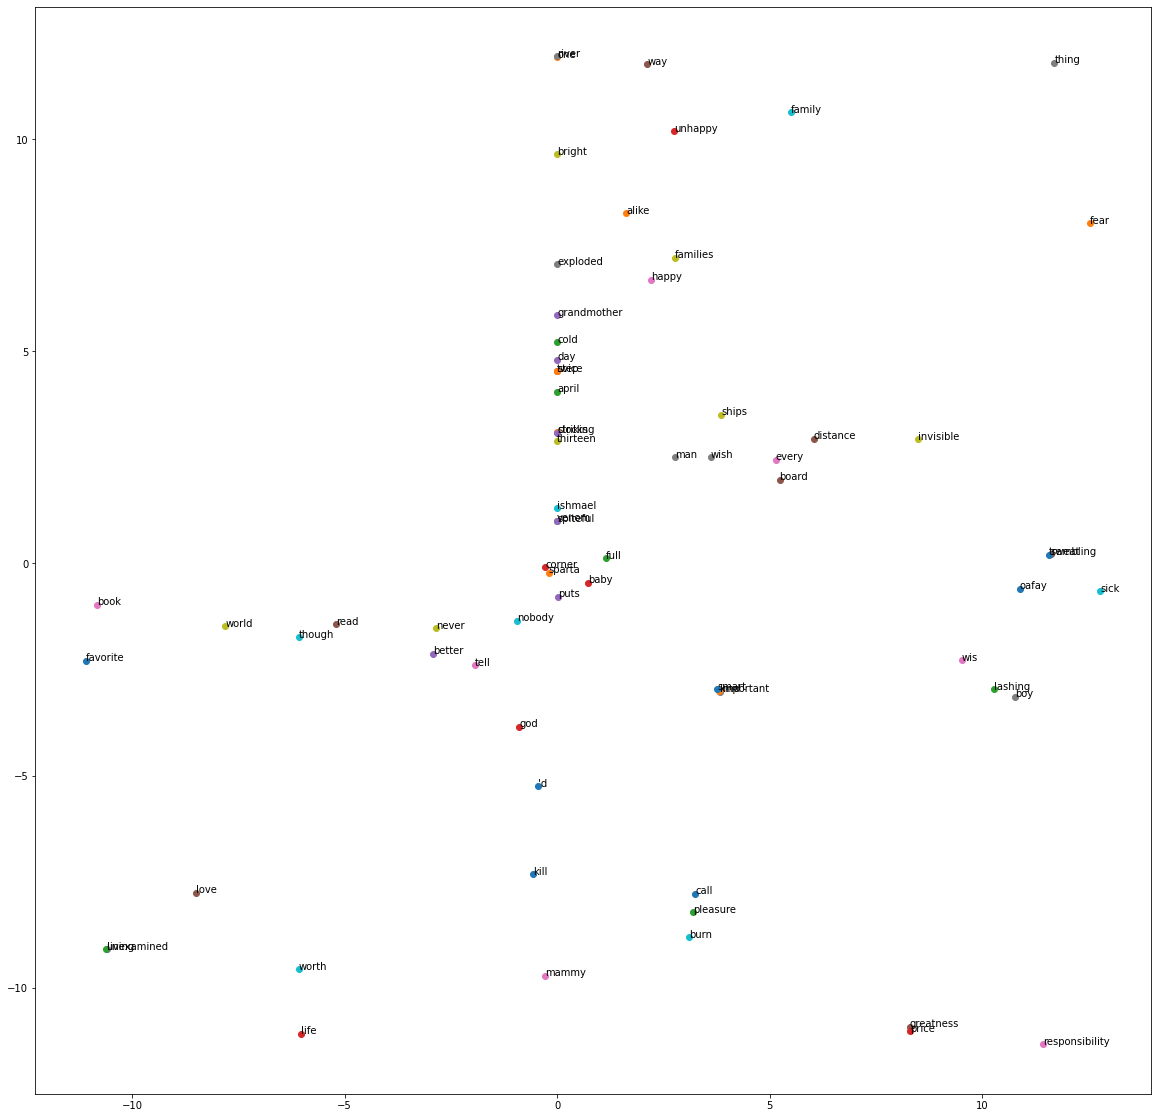

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
i = 0
for word in list(unique_word_dict.keys()):
    print(i, ' >> ', word)
    # coord = embedding_dict.get(word)
    coord = embedding_dict_1.get(word)
    if weights_1[i][0] < 0 and weights_1[i][1] > 0:
        plt.scatter(0, weights_1[i][1])
        plt.annotate(word, (0, weights_1[i][1]))
    else:
        plt.scatter(weights_1[i][0], weights_1[i][1])
        plt.annotate(word, (weights_1[i][0], weights_1[i][1]))

        #plt.xlim(-0.5, 0.5)
        #plt.ylim(-0.5, 0.5)
        #plt.show()
    i = i + 1

# second Text

In [38]:
texts = pd.read_csv('TextNLP.csv')

texts = [x for x in texts[:20]['text']]
print(len(texts))
print(texts)

19
['May the Force be with you', "There's no place like home", "I'm the king of the world!", ' Carpe diem. Seize the day, boys. Make your lives extraordinary', 'Elementary, my dear Watson', "It's alive! It's alive!", " My mama always said life was like a box of chocolates. You never know what you're gonna get", "I'll be back", "You're gonna need a bigger boat", "Here's looking at you, kid", '  My precious', ' Houston, we have a problem', "There's no crying in baseball!", ' E.T. phone home', "You can't handle the truth!", 'A martini. Shaken, not stirred', 'Life is a banquet, and most poor suckers are starving to death!', 'If you build it, he will come', ' The stuff that dreams are made of']


In [39]:
# Defining the window for context
window = 2

# Creating a placeholder for the scanning of the word list
word_lists = []
all_text = []
for text in texts:

    # Cleaning the text
    text = text_preprocessing(text)
    # print (text)

    # Appending to the all text list
    all_text += text

    # Creating a context dictionary
    for i, word in enumerate(text):
        for w in range(window):
            # Getting the context that is ahead by *window* words
            if i + 1 + w < len(text):
                word_lists.append([word] + [text[(i + 1 + w)]])
            # Getting the context that is behind by *window* words
            if i - w - 1 >= 0:
                word_lists.append([word] + [text[(i - w - 1)]])

word_lists

[['may', 'force'],
 ['force', 'may'],
 ['place', 'like'],
 ['place', 'home'],
 ['like', 'home'],
 ['like', 'place'],
 ['home', 'like'],
 ['home', 'place'],
 ['king', 'world'],
 ['world', 'king'],
 ['carpe', 'diem'],
 ['carpe', 'seize'],
 ['diem', 'seize'],
 ['diem', 'carpe'],
 ['diem', 'day'],
 ['seize', 'day'],
 ['seize', 'diem'],
 ['seize', 'boys'],
 ['seize', 'carpe'],
 ['day', 'boys'],
 ['day', 'seize'],
 ['day', 'make'],
 ['day', 'diem'],
 ['boys', 'make'],
 ['boys', 'day'],
 ['boys', 'lives'],
 ['boys', 'seize'],
 ['make', 'lives'],
 ['make', 'boys'],
 ['make', 'extraordinary'],
 ['make', 'day'],
 ['lives', 'extraordinary'],
 ['lives', 'make'],
 ['lives', 'boys'],
 ['extraordinary', 'lives'],
 ['extraordinary', 'make'],
 ['elementary', 'dear'],
 ['elementary', 'watson'],
 ['dear', 'watson'],
 ['dear', 'elementary'],
 ['watson', 'dear'],
 ['watson', 'elementary'],
 ['alive', 'alive'],
 ['alive', 'alive'],
 ['mama', 'always'],
 ['mama', 'said'],
 ['always', 'said'],
 ['always', 'ma

In [40]:
unique_word_dict = create_unique_word_dict(all_text)
# Defining the number of features (unique words)
n_words = len(unique_word_dict)
print(unique_word_dict)

# Getting all the unique words
words_2 = list(unique_word_dict.keys())
print(words_2)

# Creating the X and Y matrices using one hot encoding
print(n_words)

{'alive': 0, 'always': 1, 'back': 2, 'banquet': 3, 'baseball': 4, 'bigger': 5, 'boat': 6, 'box': 7, 'boys': 8, 'build': 9, 'ca': 10, 'carpe': 11, 'chocolates': 12, 'come': 13, 'crying': 14, 'day': 15, 'dear': 16, 'death': 17, 'diem': 18, 'dreams': 19, 'e.t': 20, 'elementary': 21, 'extraordinary': 22, 'force': 23, 'get': 24, 'gon': 25, 'handle': 26, 'home': 27, 'houston': 28, 'kid': 29, 'king': 30, 'know': 31, 'life': 32, 'like': 33, 'lives': 34, 'looking': 35, 'made': 36, 'make': 37, 'mama': 38, 'martini': 39, 'may': 40, "n't": 41, 'na': 42, 'need': 43, 'never': 44, 'phone': 45, 'place': 46, 'poor': 47, 'precious': 48, 'problem': 49, 'said': 50, 'seize': 51, 'shaken': 52, 'starving': 53, 'stirred': 54, 'stuff': 55, 'suckers': 56, 'truth': 57, 'watson': 58, 'world': 59}
['alive', 'always', 'back', 'banquet', 'baseball', 'bigger', 'boat', 'box', 'boys', 'build', 'ca', 'carpe', 'chocolates', 'come', 'crying', 'day', 'dear', 'death', 'diem', 'dreams', 'e.t', 'elementary', 'extraordinary', 

In [41]:
X = []
Y = []
for i, word_list in tqdm(enumerate(word_lists)):
    # Getting the indices
    print(word_list)
    main_word_index = unique_word_dict.get(word_list[0])
    context_word_index = unique_word_dict.get(word_list[1])
    # print (word_list)
    print(word_list[0], main_word_index)
    print(word_list[1], context_word_index)

    # Creating the placeholders
    X_row = np.zeros(n_words)
    Y_row = np.zeros(n_words)

    # One hot encoding the main word
    X_row[main_word_index] = 1

    # One hot encoding the Y matrix words
    Y_row[context_word_index] = 1

    # Appending to the main matrices
    X.append(X_row)
    Y.append(Y_row)

# Converting the matrices into a sparse format because the vast majority of the data are 0s
print(X)
print(Y)

154it [00:00, 904.14it/s]


['may', 'force']
may 40
force 23
['force', 'may']
force 23
may 40
['place', 'like']
place 46
like 33
['place', 'home']
place 46
home 27
['like', 'home']
like 33
home 27
['like', 'place']
like 33
place 46
['home', 'like']
home 27
like 33
['home', 'place']
home 27
place 46
['king', 'world']
king 30
world 59
['world', 'king']
world 59
king 30
['carpe', 'diem']
carpe 11
diem 18
['carpe', 'seize']
carpe 11
seize 51
['diem', 'seize']
diem 18
seize 51
['diem', 'carpe']
diem 18
carpe 11
['diem', 'day']
diem 18
day 15
['seize', 'day']
seize 51
day 15
['seize', 'diem']
seize 51
diem 18
['seize', 'boys']
seize 51
boys 8
['seize', 'carpe']
seize 51
carpe 11
['day', 'boys']
day 15
boys 8
['day', 'seize']
day 15
seize 51
['day', 'make']
day 15
make 37
['day', 'diem']
day 15
diem 18
['boys', 'make']
boys 8
make 37
['boys', 'day']
boys 8
day 15
['boys', 'lives']
boys 8
lives 34
['boys', 'seize']
boys 8
seize 51
['make', 'lives']
make 37
lives 34
['make', 'boys']
make 37
boys 8
['make', 'extraordinary'

In [42]:
import tensorflow as tf

# X= sparse.csr_matrix(X)
# Y = sparse.csr_matrix(Y)
# print (X)
# print(X[0, :].toarray())
# print (X.todense())
# a = X.todense()
# print (a[0])
XX = tf.convert_to_tensor(X, dtype=tf.float32)
YY = tf.convert_to_tensor(Y, dtype=tf.float32)
print(XX.shape)
print(YY.shape)

(154, 60)
(154, 60)


In [43]:
def CreateModel():
    # Defining the size of the embedding
    embed_size = 2
    # Defining the neural network

    # inp = Input(shape=(X.shape[1],))
    inp = Input(shape=XX.shape[1])  # 21
    x = Dense(units=embed_size, activation='linear')(inp)
    # x = Dense(units=21, activation='softmax')(x)
    x = Dense(units=YY.shape[1], activation='softmax')(x)

    model = Model(inputs=inp, outputs=x)
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    model.summary()
    return model

In [44]:
model_2 = CreateModel()
# Optimizing the network weights
model_2.fit(
    x=XX,
    y=YY,
    batch_size=20,
    epochs=2000
)


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 60)]              0         
                                                                 
 dense_4 (Dense)             (None, 2)                 122       
                                                                 
 dense_5 (Dense)             (None, 60)                180       
                                                                 
Total params: 302
Trainable params: 302
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
8/8 [==============================] - 0s 3ms/step - loss: 4.0889
Epoch 2/2000
8/8 [==============================] - 0s 3ms/step - loss: 4.0858
Epoch 3/2000
8/8 [==============================] - 0s 3ms/step - loss: 4.0830
Epoch 4/2000
8/8 [==============================] - 0s 2ms/step - loss: 4.0804
Epoch 5/2

In [45]:

# The input layer

weights_2 = model_2.get_weights()[0] #21*2
print(weights_2.shape)
print(weights_2[1][1])
print(weights_2)

# weights = model.get_weights()[2]
# print (weights)

(60, 2)
-0.5929043
[[-5.360634   -7.1882844 ]
 [ 0.8803679  -0.5929043 ]
 [ 0.2099083  -0.2620923 ]
 [ 2.8085124  -0.6568278 ]
 [ 3.5519004   4.083796  ]
 [-6.9371233  -4.3062463 ]
 [-7.091212   -1.0154    ]
 [-0.50129485 -1.3848974 ]
 [-0.6418359   7.0547476 ]
 [-1.4716654   1.6938938 ]
 [-7.2339582   3.0562148 ]
 [ 2.2172806   6.7392197 ]
 [-1.312135   -0.8008776 ]
 [ 4.0723944  -3.4984636 ]
 [-2.1036777   1.8069363 ]
 [ 0.77920663  7.004414  ]
 [ 6.705035   -6.7026525 ]
 [ 7.0475526  -1.7685668 ]
 [ 0.76516074  5.71275   ]
 [ 7.2697606   4.929787  ]
 [-1.4869034  -6.787007  ]
 [ 6.7222023  -6.501397  ]
 [-1.8936429   6.324958  ]
 [-2.0983355   1.8108687 ]
 [-5.26481    -1.8645579 ]
 [-4.2344356  -2.1024115 ]
 [-6.1901197   5.1386743 ]
 [-0.674977   -4.072201  ]
 [ 2.5803926   2.2338839 ]
 [ 2.161214    2.8068707 ]
 [ 4.174542   -3.462639  ]
 [-2.9229925  -1.8293128 ]
 [ 0.5494358   0.12113683]
 [-0.2892341  -0.98760414]
 [-1.3427852   5.2207174 ]
 [ 2.0032978   2.4114847 ]
 [ 6.8362

In [47]:
#get the weight for each unique word
embedding_dict_2 = {}
for word in words_2: #to pick the a row of weight of two values for each unique word since weights = 21*2
    embedding_dict_2.update({
        word: weights_2[unique_word_dict.get(word)]
    })

print(embedding_dict_2)

{'alive': array([-5.360634 , -7.1882844], dtype=float32), 'always': array([ 0.8803679, -0.5929043], dtype=float32), 'back': array([ 0.2099083, -0.2620923], dtype=float32), 'banquet': array([ 2.8085124, -0.6568278], dtype=float32), 'baseball': array([3.5519004, 4.083796 ], dtype=float32), 'bigger': array([-6.9371233, -4.3062463], dtype=float32), 'boat': array([-7.091212, -1.0154  ], dtype=float32), 'box': array([-0.50129485, -1.3848974 ], dtype=float32), 'boys': array([-0.6418359,  7.0547476], dtype=float32), 'build': array([-1.4716654,  1.6938938], dtype=float32), 'ca': array([-7.2339582,  3.0562148], dtype=float32), 'carpe': array([2.2172806, 6.7392197], dtype=float32), 'chocolates': array([-1.312135 , -0.8008776], dtype=float32), 'come': array([ 4.0723944, -3.4984636], dtype=float32), 'crying': array([-2.1036777,  1.8069363], dtype=float32), 'day': array([0.77920663, 7.004414  ], dtype=float32), 'dear': array([ 6.705035 , -6.7026525], dtype=float32), 'death': array([ 7.0475526, -1.76

0  >>  alive
1  >>  always
2  >>  back
3  >>  banquet
4  >>  baseball
5  >>  bigger
6  >>  boat
7  >>  box
8  >>  boys
9  >>  build
10  >>  ca
11  >>  carpe
12  >>  chocolates
13  >>  come
14  >>  crying
15  >>  day
16  >>  dear
17  >>  death
18  >>  diem
19  >>  dreams
20  >>  e.t
21  >>  elementary
22  >>  extraordinary
23  >>  force
24  >>  get
25  >>  gon
26  >>  handle
27  >>  home
28  >>  houston
29  >>  kid
30  >>  king
31  >>  know
32  >>  life
33  >>  like
34  >>  lives
35  >>  looking
36  >>  made
37  >>  make
38  >>  mama
39  >>  martini
40  >>  may
41  >>  n't
42  >>  na
43  >>  need
44  >>  never
45  >>  phone
46  >>  place
47  >>  poor
48  >>  precious
49  >>  problem
50  >>  said
51  >>  seize
52  >>  shaken
53  >>  starving
54  >>  stirred
55  >>  stuff
56  >>  suckers
57  >>  truth
58  >>  watson
59  >>  world


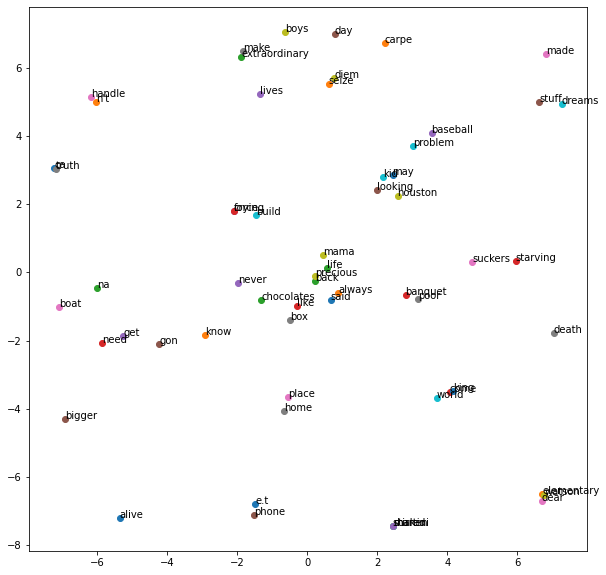

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
i = 0
for word in list(unique_word_dict.keys()):
    print(i, ' >> ', word)
    coord = embedding_dict_2.get(word)
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))
    i = i + 1


In [49]:
# The input layer
weights_2 = model_2.get_weights()[0]
# weights[: , 0] = 0

0  >>  alive
1  >>  always
2  >>  back
3  >>  banquet
4  >>  baseball
5  >>  bigger
6  >>  boat
7  >>  box
8  >>  boys
9  >>  build
10  >>  ca
11  >>  carpe
12  >>  chocolates
13  >>  come
14  >>  crying
15  >>  day
16  >>  dear
17  >>  death
18  >>  diem
19  >>  dreams
20  >>  e.t
21  >>  elementary
22  >>  extraordinary
23  >>  force
24  >>  get
25  >>  gon
26  >>  handle
27  >>  home
28  >>  houston
29  >>  kid
30  >>  king
31  >>  know
32  >>  life
33  >>  like
34  >>  lives
35  >>  looking
36  >>  made
37  >>  make
38  >>  mama
39  >>  martini
40  >>  may
41  >>  n't
42  >>  na
43  >>  need
44  >>  never
45  >>  phone
46  >>  place
47  >>  poor
48  >>  precious
49  >>  problem
50  >>  said
51  >>  seize
52  >>  shaken
53  >>  starving
54  >>  stirred
55  >>  stuff
56  >>  suckers
57  >>  truth
58  >>  watson
59  >>  world


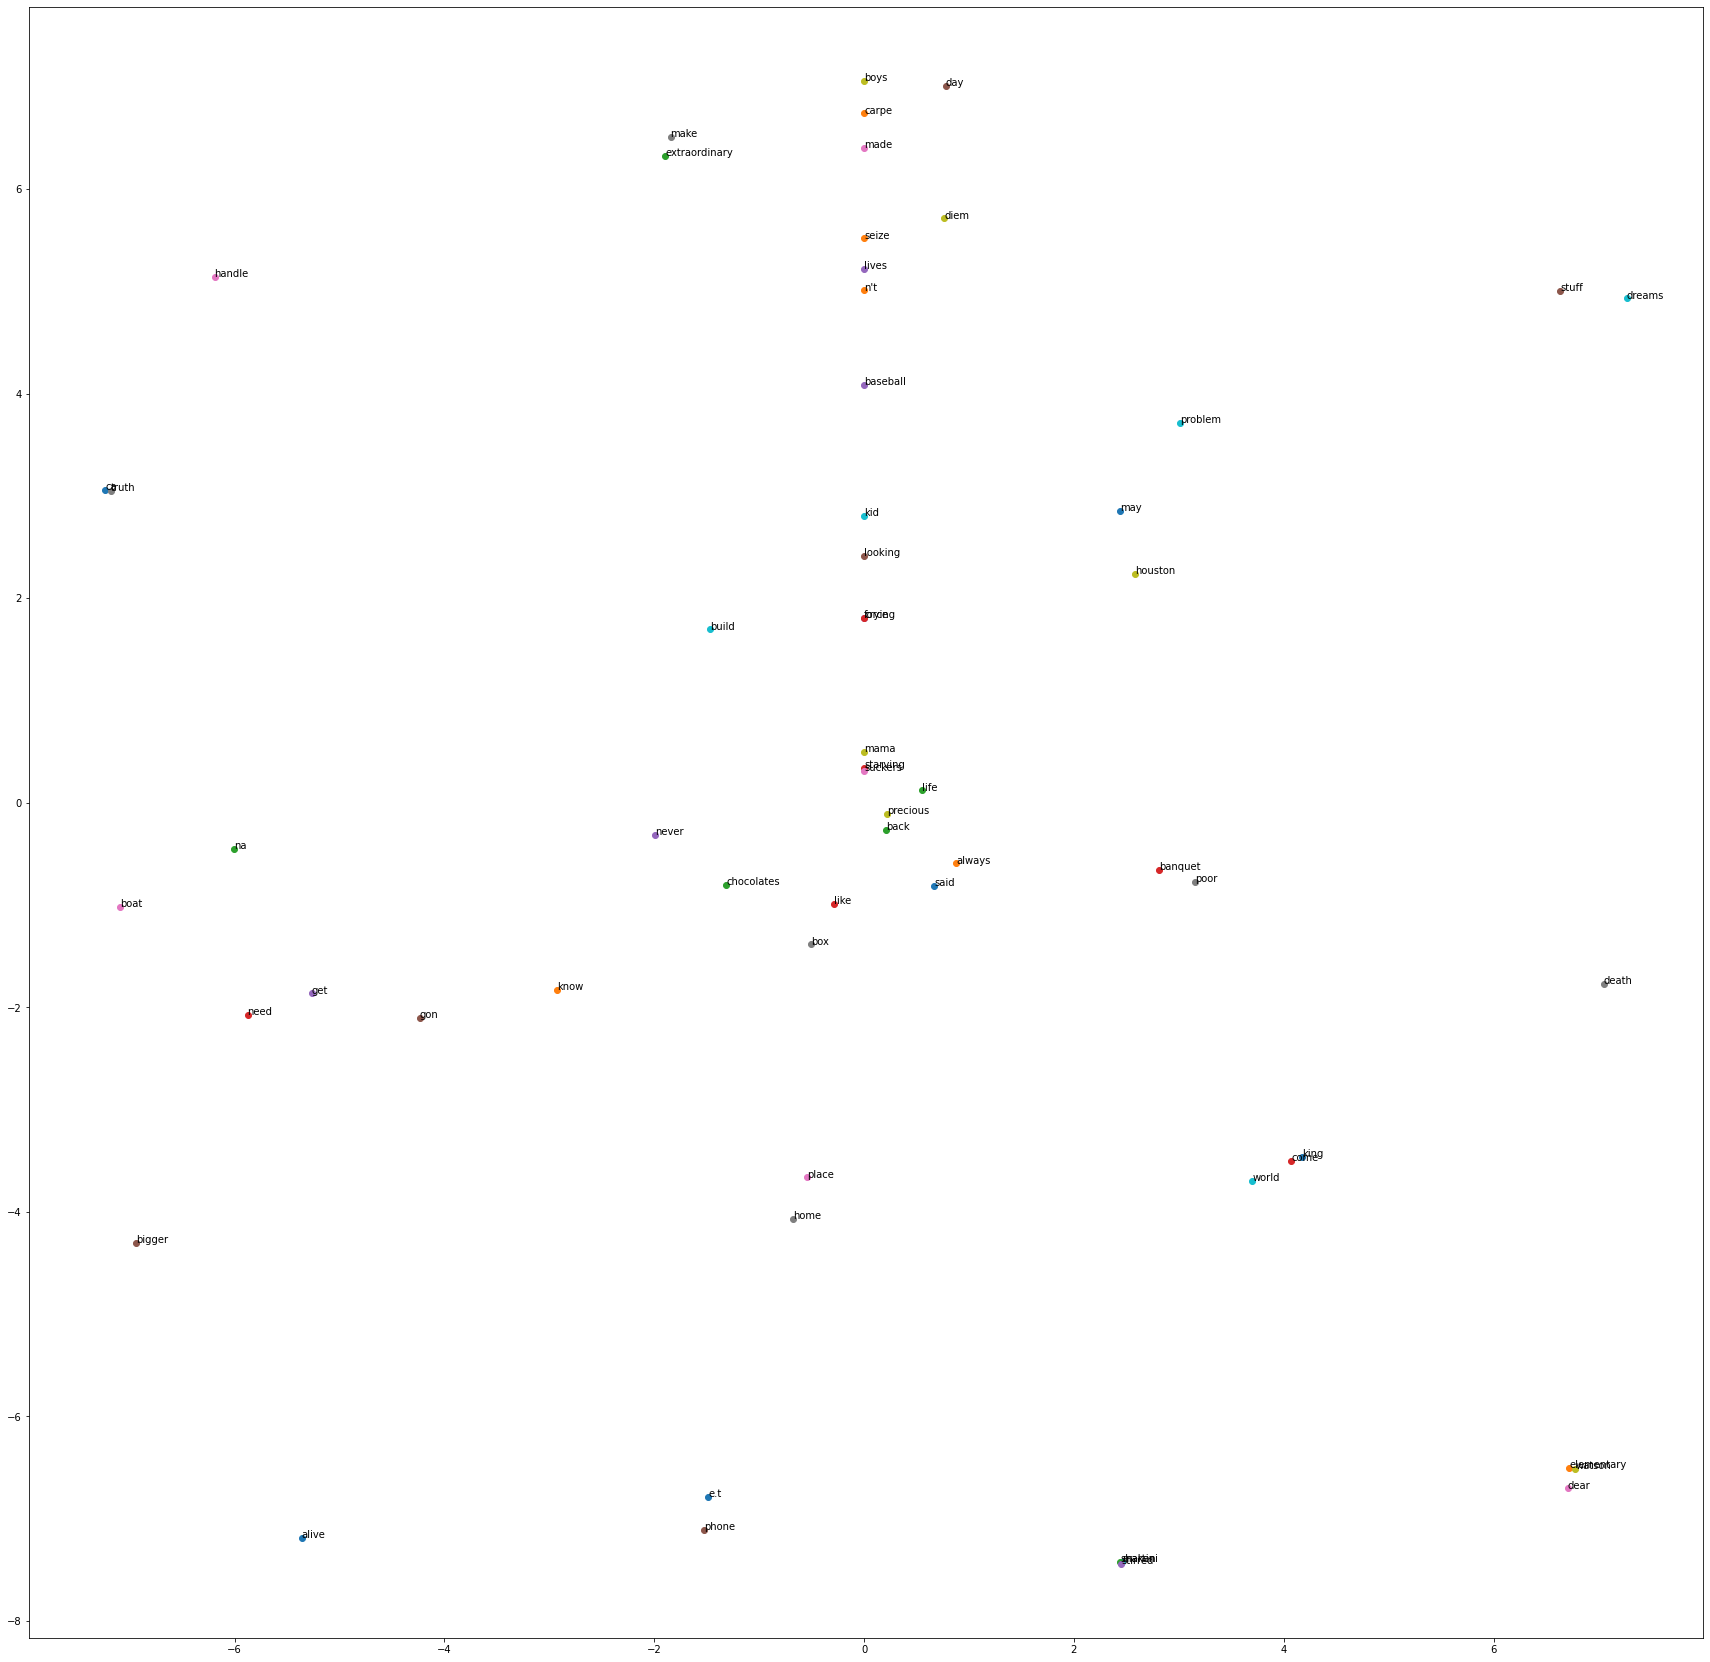

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 30))
i = 0
for word in list(unique_word_dict.keys()):
    print(i, ' >> ', word)
    # coord = embedding_dict.get(word)
    coord = embedding_dict_2.get(word)
    if weights_1[i][0] < 0 and weights_2[i][1] > 0:
        plt.scatter(0, weights_2[i][1])
        plt.annotate(word, (0, weights_2[i][1]))
    else:
        plt.scatter(weights_2[i][0], weights_2[i][1])
        plt.annotate(word, (weights_2[i][0], weights_2[i][1]))

        #plt.xlim(-0.5, 0.5)
        #plt.ylim(-0.5, 0.5)
        #plt.show()
    i = i + 1

In [57]:
def jaccard_similarity(x,y):
  """ returns the jaccard similarity between two lists """
  intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
  union_cardinality = len(set.union(*[set(x), set(y)]))
  return intersection_cardinality/float(union_cardinality)

In [62]:
sentences = [words_1,words_2]
jaccard_similarity(sentences[0], sentences[1])

0.031746031746031744

In [63]:
#pip install NLP-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
#from NLP import NLP
#nlp = NLP()

In [65]:
#from math import sqrt, pow, exp

 
#def squared_sum(x):
  """ return 3 rounded square rooted value """
 
 # return round(sqrt(sum([a*a for a in x])),3)
 
#def euclidean_distance(x,y):
  """ return euclidean distance between two lists """
 
  #return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))

In [70]:
#distance = euclidean_distance(words_1,words_2)
#print(distance)

TypeError: ignored

In [ ]:

#def distance_to_similarity(distance):
  #return 1/exp(distance)

#distance_to_similarity(distance) 